In [1]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv("tested.csv")

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
col = ['Survived', 'Pclass', 'Sex', 'Age','Ticket', 'Fare', 'Cabin']

In [30]:
df = df[col]

In [35]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Ticket       0
Fare         1
dtype: int64

In [32]:
df.count()

Survived    418
Pclass      418
Sex         418
Age         332
Ticket      418
Fare        417
Cabin        91
dtype: int64

In [33]:
df = df.drop("Cabin", axis = 1)

In [36]:
df = df.dropna()

In [37]:
df.count()

Survived    331
Pclass      331
Sex         331
Age         331
Ticket      331
Fare        331
dtype: int64

In [39]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Ticket       object
Fare        float64
dtype: object

In [42]:
df["Sex"] = df["Sex"].astype("category")
df["Sex"] = df["Sex"].cat.codes
df["Ticket"] = df["Ticket"].astype("category")
df["Ticket"] = df["Ticket"].cat.codes

In [43]:
df.dtypes

Survived      int64
Pclass        int64
Sex            int8
Age         float64
Ticket        int16
Fare        float64
dtype: object

In [44]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare
0,0,3,1,34.5,128,7.8292
1,1,3,0,47.0,181,7.0000
2,0,2,1,62.0,63,9.6875
3,0,3,1,27.0,124,8.6625
4,1,3,0,22.0,115,12.2875


In [46]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [52]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x,y, random_state = 42, test_size = 0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, x_test)

DecisionTreeClassifier()

In [59]:
y_pred = model.predict(y_train)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [61]:
print(accuracy_score(y_pred, y_test))

1.0


<Axes: >

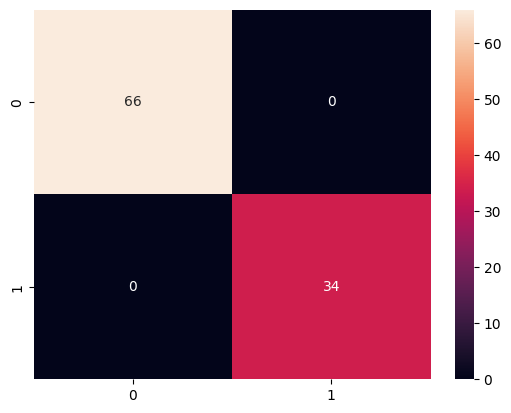

In [62]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm ,annot = True)

In [70]:
data = np.column_stack((y_pred, y_train))

In [71]:
df1 = pd.DataFrame(data, columns = df.columns)

In [72]:
df1.head()

,Survived,Pclass,Sex,Age,Ticket,Fare
0,0.0,3.0,1.0,22.5,98.0,7.2250
1,0.0,3.0,1.0,6.0,167.0,21.0750
2,0.0,2.0,1.0,2.0,107.0,23.0000
3,1.0,3.0,0.0,23.0,117.0,8.6625
4,0.0,1.0,1.0,31.0,79.0,28.5375
